![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Construcción e implementación de modelos con métodos de ensamblajes  

En este notebook aprenderá a construir e implementar dos métodos de ensamblaje (bagging y combinación de modelos), desarrollando el código manualmente y  usando la librería especializada sklearn.

## Instrucciones Generales:

Por una parte, los modelos con Bagging que construirá por medio de este notebook deberán predecir el precio de un automóvil dadas diferentes características. Por otra parte, los métodos de combinación de modelos debera predecir si un usuario deja o no de usar los servicios de una compañía (churn) teniendo en cuenta diferentes variables. Para conocer más detalles de la base de 'churn' puede ingresar al siguiente vínculo: http://srepho.github.io/Churn/Churn
   
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

## Importar base de datos y librerías

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Carga de datos de archivos .csv
import pandas as pd
import numpy as np

# Datos de entremiento
url = 'https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/vehicles_train.csv'
train = pd.read_csv(url)
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

# Datos de evaluación (test)
url = 'https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})

In [24]:
# Impresión de 5 observaciones del set de entrenamiento
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0


## Entrenar diferentes modelos

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

# Definición de 4 modelos diferentes: regresión logística, árbol de decisión,Navie Bayes y k vecinos más cercanos
models = {'lr': LinearRegression(),
          'dt': DecisionTreeRegressor(),
          'nb': GaussianNB(),
          'kn': KNeighborsRegressor()}

In [26]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
y_train = train.price
y_test = test.price

# Entrenamiento (fit) de cada modelo
for model in models.keys():
    models[model].fit(X_train, y_train)

In [27]:
# Predicción de las observaciones del set de test para cada modelo
y_pred = pd.DataFrame(index=test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [28]:
# Evaluación del error de cada modelo
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

lr 2138.3579028745116
dt 1414.213562373095
nb 5477.2255750516615
kn 1671.3268182295567


In [29]:
# Evaluación  del error promedio de las predicciones
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

1193.164765760328

## Bagging Manual

In [30]:
# Se crea un arreglo de 1 a 20
np.random.seed(1)

# Impresión de arreglo y muestreo aleatorio
nums = np.arange(1, 21)
print('Arreglo:', nums)
print('Muestreo aleatorio: ', np.random.choice(a=nums, size=20, replace=True))

Arreglo: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Muestreo aleatorio:  [ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]


In [31]:
# Creación de 10 muestras de bootstrap 
np.random.seed(123)

n_samples = train.shape[0]
n_B = 10

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [32]:
# Visualización muestra boostrap #1 para entremiento
train.iloc[samples[0], :]

,price,year,miles,doors,vtype
13,1300,1997,138000,4,0
2,13000,2010,73500,4,0
12,1800,1999,163000,2,1
2,13000,2010,73500,4,0
6,3000,2004,177000,4,0
1,14000,2010,30000,2,0
3,9500,2009,78000,4,0
10,2500,2003,190000,2,1
11,5000,2001,62000,4,0
9,1900,2003,160000,4,0


In [33]:
# Construcción un árbol de decisión para cada muestra boostrap

from sklearn.tree import DecisionTreeRegressor

# Definición del modelo usando DecisionTreeRegressor de sklearn
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# DataFrame para guardar las predicciones de cada árbol
y_pred = pd.DataFrame(index=test.index, columns=[list(range(n_B))])

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, sample in enumerate(samples):
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred.iloc[:,i] = treereg.predict(X_test)
    
y_pred

,0,1,2,3,4,5,6,7,8,9
0,1300.0,1300.0,3000.0,4000.0,1300.0,4000.0,4000.0,4000.0,3000.0,4000.0
1,5000.0,1300.0,3000.0,5000.0,5000.0,5000.0,4000.0,5000.0,5000.0,5000.0
2,14000.0,13000.0,13000.0,13000.0,13000.0,14000.0,13000.0,13000.0,9500.0,9000.0


In [34]:
# Desempeño de cada árbol
for i in range(n_B):
    print('Árbol ', i, 'tiene un error: ', np.sqrt(mean_squared_error(y_pred.iloc[:,i], y_test)))

Árbol  0 tiene un error:  1621.7274740226856
Árbol  1 tiene un error:  2942.7877939124323
Árbol  2 tiene un error:  1825.7418583505537
Árbol  3 tiene un error:  1000.0
Árbol  4 tiene un error:  1276.7145334803704
Árbol  5 tiene un error:  1414.213562373095
Árbol  6 tiene un error:  1414.213562373095
Árbol  7 tiene un error:  1000.0
Árbol  8 tiene un error:  1554.5631755148024
Árbol  9 tiene un error:  1914.854215512676


In [35]:
# Predicciones promedio para cada obserbación del set de test
y_pred.mean(axis=1)

0     2990.0
1     4330.0
2    12450.0
dtype: float64

In [36]:
# Error al promediar las predicciones de todos los árboles
np.sqrt(mean_squared_error(y_test, y_pred.mean(axis=1)))

998.5823284370031

## Bagging con sklearn

In [37]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [38]:
# Uso de BaggingRegressor de la libreria (sklearn) donde se usa el modelo DecisionTreeRegressor como estimador
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, 
                          bootstrap=True, oob_score=True, random_state=1)

In [39]:
# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([ 3344.2,  5395. , 12902. ])

In [40]:
# Cálculo del error del modelo
np.sqrt(mean_squared_error(y_test, y_pred))

657.8000304043775

## Estimar el error out-of-sample

In [41]:
# Visualización de la primera muestra de bootstrap
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [42]:
# Visualización de las observaciones dentro de la bolsa "in-bag" para cada muestra
for sample in samples:
    print(set(sample))

{0, 1, 2, 3, 6, 9, 10, 11, 12, 13}
{0, 1, 2, 3, 4, 7, 9, 13}
{0, 2, 3, 4, 6, 7, 8, 9, 12, 13}
{0, 1, 2, 3, 5, 6, 8, 10, 11, 12}
{2, 3, 4, 6, 10, 11, 12, 13}
{0, 1, 4, 5, 6, 7, 9, 10, 11}
{0, 1, 2, 3, 4, 5, 8, 9, 12}
{1, 2, 3, 5, 6, 7, 9, 11}
{1, 3, 6, 7, 8, 9, 11, 12}
{0, 1, 3, 4, 5, 6, 8, 10, 11, 13}


In [43]:
# Visualización de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    print(sorted(set(range(n_samples)) - set(sample)))

[4, 5, 7, 8]
[5, 6, 8, 10, 11, 12]
[1, 5, 10, 11]
[4, 7, 9, 13]
[0, 1, 5, 7, 8, 9]
[2, 3, 8, 12, 13]
[6, 7, 10, 11, 13]
[0, 4, 8, 10, 12, 13]
[0, 2, 4, 5, 10, 13]
[2, 7, 9, 12]


In [44]:
# Cálculo del error the out-of-bag con el R-cuadrado (no con el MSE)
bagreg.oob_score_

0.7986955133989982

## Combinación de clasificadores - Votación mayoritaria manual

In [1]:
import pandas as pd
import numpy as np

# Carga de datos de archivos .csv
url = 'https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/churn.csv'
data = pd.read_csv(url)

# Separación de variables predictoras (X) y variable de interés (y)

# Seleción de variables numéricas
X = data.iloc[:, [1,2,6,7,8,9,10]].astype(np.float)
X = X.join((data.iloc[:, [4,5]] == 'no').astype(np.float))

y = (data.iloc[:, -1] == 'True.').astype(np.int)

In [2]:
# Impresión datos
X.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Int'l Plan,VMail Plan
0,128.0,415.0,25.0,265.1,110.0,45.07,197.4,1.0,0.0
1,107.0,415.0,26.0,161.6,123.0,27.47,195.5,1.0,0.0
2,137.0,415.0,0.0,243.4,114.0,41.38,121.2,1.0,1.0
3,84.0,408.0,0.0,299.4,71.0,50.90,61.9,0.0,1.0
4,75.0,415.0,0.0,166.7,113.0,28.34,148.3,0.0,1.0


In [3]:
# Proporciones de las diferentes clases de variable de interés (y)
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,2850,0.855086
1,483,0.144914


In [4]:
#  Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [6]:
# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [7]:
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
438,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1345,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1957,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [8]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

438      2
2674     5
1345    35
1957    17
2148     3
3106     4
1786    22
321      6
3082    10
2240     5
dtype: int64

In [9]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.5245901639344264

In [10]:
# Desempeño al hacer votación mayoritaria
metrics.accuracy_score(y_pred, y_test)

0.8945454545454545

## Combinación de clasificadores - Votación mayoritaria con sklearn

In [11]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [12]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.536, 0.8945454545454545)

## Combinación de clasificadores - Votación ponderada manual

In [13]:
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [14]:
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

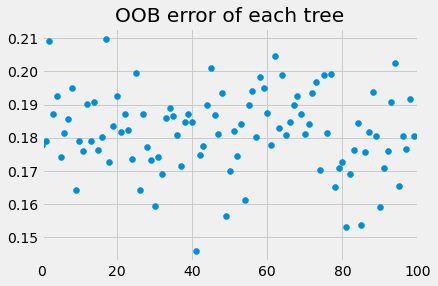

In [15]:
# Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [16]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [17]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

438     0.019994
2674    0.050009
1345    0.350206
1957    0.170230
2148    0.030047
3106    0.040100
1786    0.219790
321     0.059708
3082    0.100208
2240    0.050143
1910    0.180209
2124    0.190141
2351    0.049892
1736    0.950014
879     0.039378
785     0.219648
2684    0.010104
787     0.700482
170     0.220404
1720    0.020166
dtype: float64

In [18]:
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5267489711934156, 0.8954545454545455)

## Combinación de clasificadores - Votación ponderada con sklearn

In [19]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.536, 0.8945454545454545)

In [20]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [21]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5476190476190478, 0.8963636363636364)